# Research Paper

## Import Libraries

In [46]:
# test hehe
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob, Word
import re
from spellchecker import SpellChecker
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stop_words = set(stopwords.words('english'))
lmtzr = nltk.WordNetLemmatizer()
pd.options.display.max_colwidth = 300

## Preparing for Sentiment Analysis

### Loading datasets

In [2]:
ebay_dataset = pd.read_csv("ebay_reviews.csv", usecols=['review title', 'review content'])
amazon_dataset = pd.read_csv("Reviews.csv", usecols=['ProductId', 'UserId', 'Text'])
walmart_dataset = pd.read_csv("marketing_sample_for_walmart_com-walmart_product_reviews__20200401_20200630__30k_data.csv", usecols=['Review', 'Reviewer Name'])
walmart_dataset = walmart_dataset.dropna()

# Reduce row size to 1000 to be more to reduce pre-processing time.
ebay_dataset = ebay_dataset.iloc[:1000]
amazon_dataset = amazon_dataset.iloc[:1000]
walmart_dataset = walmart_dataset.iloc[:1000]

C:\Users\danie\AppData\Local\Temp\ipykernel_7380\1464603536.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  shopee_dataset = pd.read_csv("shopee_reviews.csv")


In [4]:
ebay_dataset

,review title,review content
0,Wireless gaming headset,This gaming headset ticks all the boxes # looks grate # built to last # excellent sound & mic # comfortable to wear # easy to set up what more could you ask for.
1,"Good for those with a big head, low budget","Easy setup, rated for 6 hours battery but mine has lasted for sessions over 8, good loudness from the earcups, has a comfortable seal And thick padding around the ears for a person with a med to big head. Would look funny on a small child though as they are large headphones. Mike sounds ok for p..."
2,MezumiWireless Gaming Headset,"I originally bought this wireless headset for my Xbox (latest model) with the 3.5 plug jack in the headset. Unfortunately it didn't work, but nothing seems to work with the Xbox. So I connected them to my Dell laptop. They are just the best very crisp and clear, very easy to set-up. They are a v..."
3,HW- S2 great headset.,"This is my 2nd Mezumi headset, It kills the first one , better range , lasts longer before re-charge & more comfortable fit. I had to buy a longer charge lead so I could plug it in while wearing . Not really needed for my length of use per day.Read full review..."
4,BEST HEADPHONES I'VE PURCHASED IN MY ENTIRE LIFE,This is probably the best headset I've purchased till date. The sound quality is superb and so is the mic. SOund Booster works perfectly as I tuned the headphone's volume to full using the key on left ear bud and controlling the volume from my PC's volume controller.Please remember that BUILD QU...
...,...,...
995,thank you,Thank you for the ps vita i can't stop playing
996,No Complaints,"My Vita showed up a day before it was scheduled and everything was included, just as the summary said. Vita is like new, looks hardly touched, and was formatted and ready for me to sign in and play. Great deal!Read full review..."
997,GOOD!,excelente muy buena consola y en excelente estado.
998,psp vita,very good


In [5]:
amazon_dataset

,ProductId,UserId,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,B00813GRG4,A1D87F6ZCVE5NK,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,B000LQOCH0,ABXLMWJIXXAIN,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly ..."
3,B000UA0QIQ,A395BORC6FGVXV,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."
...,...,...,...
995,B006F2NYI2,A1D3F6UI1RTXO0,"BLACK MARKET HOT SAUCE IS WONDERFUL.... My husband Loves this Habenero sauce, its very very flavorful with a nice kick to it. I in fact love the medium sauce- the taste is so yummy with a bit of zing behind it. We used it for everything and you can use it with any meal.<br /><br />I like the fac..."
996,B006F2NYI2,AF50D40Y85TV3,"Man what can i say, this salsa is the bomb!! i have all the different kinds. i have it with almost every meal. the owner is a cool dude, He's dropped off free bottles to me in my mailbox. i stole the first bottle out of a friends fridge after i tasted and been hooked since. dont sleep on this ho..."
997,B006F2NYI2,A3G313KLWDG3PW,"this sauce is so good with just about anything, i like adding it to asian food or anything with egg or noodles, it has a good burn with a strong flavor. im hoping to see some of the other flavors like the pineapple experiment on here soon. buy it you wont regret it"
998,B006F2NYI2,A3NIDDT7E7JIFW,"Not hot at all. Like the other low star reviewer, I got suckered by seeing 'habenero' in the name and the 12 oz size. Some people might like the flavor, citrus-y and it has some fish sauce in the mix (according to the ingredient label), but if you're looking for hot this ain't it"


In [6]:
walmart_dataset

,Review,Reviewer Name
0,"One star for looking nice. That’s it. After trying and trying to par it to my iPhone (which it finally did) , the sound quality was so bad, I could not understand one word! Waste of money.",PJ10
1,Love this phone so far have had it almost a month and had no bad problems with it. The reason I gave it 4 stars it because the battery takes forever to charge!! Other than that great phone!!,KelJo
2,"This TV is absolutely fantastic. This is my third 4k TV and it blows away everything I have had previously (even the more expensive sets). Brightness is unbelievable, HDR is perfect, SONY's motion processor is by far the best on the market, and android TV is unbelievably smooth on this tv (compa...",TheBigChalupa11
3,"Refurb, good shape, good price, does what I want it to do.",Micalic
4,Very nice tablet! Looks brand new. Fired right up with no problems. Very happy with purchase. Great price point too.,jcan74
...,...,...
1276,"Bought the Roku 4 over the Apple TV because of Roku's 4K streaming capability. However the mirroring features on Roku only work for a handful of Android and Windows devices and is still labeled as ""beta"" in the system menu. The streaming choices are strong but selecting 4K / UHD streaming result...",MarcusBickles
1278,"Hi Walmart, We bought this product for our residents as a promotion. We are unable to rate this product at this time. Although,we should hear from our residents soon and will encourage them to share their feedback. We think, the online order was swift, delivery was perfect, and on time. But, it ...",Rinkers337
1279,"This watch is perfect in my opinion, the features are amazing. I was looking for a device that monitors my heart rate, exercises, elevation, stress rate, reminders alert. this watch does it all and more, it even remind me when I have been seating to long and need to stretch, I truly recommend th...",prophete
1280,I have been wearing this Dickies shirt for 20 years. Every 5 years I have to replace them. I wear them as a Uniform shirt at work every day. I cannot believe how well they hold up.,Jimmy Ray


### Setting up methods for getting polarity and analyzing polarity score

In [7]:
# Get polarity score of text
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Analyze polarity score
def getAnalysis(polarity_score):
    if polarity_score < 0:
        return 'Negative'
    elif polarity_score == 0:
        return 'Neutral'
    else:
        return 'Positive'

### Text pre-processing

Used pre-processing techniques:

 - Converting all characters to lowercase
 - Removing URLs
 - Removing hashtags
 - Removing numerical data
 - Converting emojis to words
 - Removing extra whitespaces
 - Correcting spelling
 - Removing stopwords

In [8]:
# Converting all characters to lowercase
def lowercasing(text):
    return text.lower()

# Remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Remove hashtags
def remove_hashtags(text):
    hashtag_pattern = re.compile(r'#([^\s]+)')
    return hashtag_pattern.sub(r'', text)

# Remove numerical data
def remove_num(text):
    return "".join([i for i in text if not i.isdigit()])

# Remove extra whitespace
def remove_extraws(text):
    return " ".join(text.split())

# Spell checker
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

# Remove stopwords
def remove_sw(text):
    temp_text = ''
    for word in text.split(): 
        if word not in stop_words:
            temp_text += (word + ' ')
    text = temp_text
    return text

In [9]:
# Use defined methods for text pre-processing

def preprocessText(col):
    col = col.str.lower() # Convert to lowercase
    col = col.apply(lambda text: remove_urls(text)) #Remove URLs
    col = col.apply(lambda text: remove_hashtags(text)) # Remove hashtags
    col = col.apply(lambda text: remove_num(text)) # Remove numerical data
    col = col.apply(lambda text: remove_extraws(text)) # Remove extra whitespace
    col = col.apply(lambda text: correct_spellings(text)) # Correct misspellings
    col = col.apply(lambda text: remove_sw(text)) # Remove stopwords
    return col

# Apply text pre-processing to datasets
ebay_dataset['review content'] = preprocessText(ebay_dataset['review content'])
amazon_dataset['Text'] = preprocessText(amazon_dataset['Text'])
walmart_dataset['Review'] = preprocessText(walmart_dataset['Review'])

### Pre-processed texts

In [11]:
ebay_dataset

,review title,review content
0,Wireless gaming headset,gaming headset ticks boxes # looks grate # built last # excellent sound & mic # comfortable wear # easy set could ask
1,"Good for those with a big head, low budget","easy setup rated hours battery mine lasted sessions , good loudness earcups, comfortable seal thick padding around ears person med big head would look funny small child though large headphones mike sounds ok price lighting effects work look good decent purchase would recommend casual gamer needi..."
2,MezumiWireless Gaming Headset,originally bought wireless headset xbox latest model . plug jack headset unfortunately work nothing seems work xbox connected dell laptop best crisp clear easy setup reasonable price high quality headset find wear long extended periods also adjustable wifey two boys plus use versatile whole fami...
3,HW- S2 great headset.,"megumi headset kills first one , better range , lasts longer recharge & comfortable fit buy longer charge lead could plug wearing . really needed length use per daydream full review..."
4,BEST HEADPHONES I'VE PURCHASED IN MY ENTIRE LIFE,probably best headset i've purchased till date sound quality superb mice sound booster works perfectly tuned headphones volume full using key left ear bud controlling volume pa's volume controller.please remember build quality superb would definetly recommend anyone cost bucks quality comparable...
...,...,...
995,thank you,thank vita can't stop playing
996,No Complaints,vita showed day scheduled everything included summary said vita like new looks hardly touched formatted ready sign play great deal!read full review...
997,GOOD!,excelent muy buena console en excelent estado
998,psp vita,good


In [12]:
amazon_dataset

,ProductId,UserId,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
1,B00813GRG4,A1D87F6ZCVE5NK,"product arrived labeled jumbo salted peanuts...the peanuts actually small sized unsalted sure error vendor intended represent product ""jumbo""."
2,B000LQOCH0,ABXLMWJIXXAIN,confection around centuries light pillowy citrus gelatin nuts - case gilberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story case lewis lion witch wardrobe - treat seduces edmund selling brother sisters witch
3,B000UA0QIQ,A395BORC6FGVXV,looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal
4,B006K2ZZ7K,A1UQRSCLF8GW1T,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal
...,...,...,...
995,B006F2NYI2,A1D3F6UI1RTXO0,black market hot sauce wonderful.... husband loves habanero sauce flavorful nice kick fact love medium sauce taste yummy bit zing behind used everything use meal.<br /><br like fact many different levels spiciness love medium & habanero kind like & package thank hard work guys keep hard work
996,B006F2NYI2,AF50D40Y85TV3,man say salsa bomb different kinds almost every meal owner cool dude he's dropped free bottles mailbox stole first bottle friends fridge tasted hooked since dont sleep hot sauce
997,B006F2NYI2,A3G313KLWDG3PW,sauce good anything like adding asian food anything egg noodles good burn strong flavor im hoping see flavors like pineapple experiment soon buy wont regret
998,B006F2NYI2,A3NIDDT7E7JIFW,hot like low star reviewer got suckered seeing 'habenero' name oz size people might like flavor citrusy fish sauce mix according ingredient label looking hot ain't


In [13]:
walmart_dataset

,Review,Reviewer Name
0,"one star looking nice that's trying trying par iphone finally , sound quality bad could understand one word waste money",PJ10
1,love phone far almost month bad problems reason gave stars battery takes forever charge great phone,KelJo
2,absolutely fantastic third blows away everything previously even expensive sets brightness unbelievable perfect son's motion processor far best market android unbelievably smooth compared vida shield apple firestick). concerns back lighting zones halting extremely overblown yes see halting see e...,TheBigChalupa11
3,"refurb, good shape good price want",Micalic
4,nice tablet looks brand new fired right problems happy purchase great price point,jcan74
...,...,...
1276,bought roku apple rok's streaming capability however mirroring features roku work handful android windows devices still labeled beta system menu streaming choices strong selecting / uh streaming resulted little grandness compared smart hub old internet wild speeds maps wifi strength root cause,MarcusBickles
1278,"hi walmart bought product residents promotion unable rate product time although,we hear residents soon encourage share feedback think online order swift delivery perfect time hard pay delivery spend purchase however purchasing delivery made easier swallow always tell teams happy employees=happie...",Rinkers337
1279,watch perfect opinion features amazing looking device monitors heart rate exercises elevation stress rate reminders alert watch even remind seating long need stretch truly recommend watch anyone looking great smartwatch,prophete
1280,wearing dickies shirt years every years replace wear uniform shirt work every day cannot believe well hold,Jimmy Ray


## Sentiment Analysis

### Get polarity score

In [31]:
ebay_dataset['Polarity'] = ebay_dataset['review content'].apply(getPolarity)
amazon_dataset['Polarity'] = amazon_dataset['Text'].apply(getPolarity)
walmart_dataset['Polarity'] = walmart_dataset['Review'].apply(getPolarity)

In [32]:
ebay_dataset

,review title,review content,Polarity,Analysis
0,Wireless gaming headset,gaming headset ticks boxes # looks grate # built last # excellent sound & mic # comfortable wear # easy set could ask,0.446667,Positive
1,"Good for those with a big head, low budget","easy setup rated hours battery mine lasted sessions , good loudness earcups, comfortable seal thick padding around ears person med big head would look funny small child though large headphones mike sounds ok price lighting effects work look good decent purchase would recommend casual gamer needi...",0.190306,Positive
2,MezumiWireless Gaming Headset,originally bought wireless headset xbox latest model . plug jack headset unfortunately work nothing seems work xbox connected dell laptop best crisp clear easy setup reasonable price high quality headset find wear long extended periods also adjustable wifey two boys plus use versatile whole fami...,0.218448,Positive
3,HW- S2 great headset.,"megumi headset kills first one , better range , lasts longer recharge & comfortable fit buy longer charge lead could plug wearing . really needed length use per daydream full review...",0.350000,Positive
4,BEST HEADPHONES I'VE PURCHASED IN MY ENTIRE LIFE,probably best headset i've purchased till date sound quality superb mice sound booster works perfectly tuned headphones volume full using key left ear bud controlling volume pa's volume controller.please remember build quality superb would definetly recommend anyone cost bucks quality comparable...,0.505882,Positive
...,...,...,...,...
995,thank you,thank vita can't stop playing,0.000000,Neutral
996,No Complaints,vita showed day scheduled everything included summary said vita like new looks hardly touched formatted ready sign play great deal!read full review...,0.238939,Positive
997,GOOD!,excelent muy buena console en excelent estado,0.000000,Neutral
998,psp vita,good,0.700000,Positive


In [33]:
amazon_dataset

,ProductId,UserId,Text,Polarity,Analysis
0,B001E4KFG0,A3SGXH7AUHU8GW,bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better,0.425000,Positive
1,B00813GRG4,A1D87F6ZCVE5NK,"product arrived labeled jumbo salted peanuts...the peanuts actually small sized unsalted sure error vendor intended represent product ""jumbo"".",0.216667,Positive
2,B000LQOCH0,ABXLMWJIXXAIN,confection around centuries light pillowy citrus gelatin nuts - case gilberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story case lewis lion witch wardrobe - treat seduces edmund selling brother sisters witch,0.187000,Positive
3,B000UA0QIQ,A395BORC6FGVXV,looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal,0.150000,Positive
4,B006K2ZZ7K,A1UQRSCLF8GW1T,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal,0.458333,Positive
...,...,...,...,...,...
995,B006F2NYI2,A1D3F6UI1RTXO0,black market hot sauce wonderful.... husband loves habanero sauce flavorful nice kick fact love medium sauce taste yummy bit zing behind used everything use meal.<br /><br like fact many different levels spiciness love medium & habanero kind like & package thank hard work guys keep hard work,0.233333,Positive
996,B006F2NYI2,AF50D40Y85TV3,man say salsa bomb different kinds almost every meal owner cool dude he's dropped free bottles mailbox stole first bottle friends fridge tasted hooked since dont sleep hot sauce,0.250000,Positive
997,B006F2NYI2,A3G313KLWDG3PW,sauce good anything like adding asian food anything egg noodles good burn strong flavor im hoping see flavors like pineapple experiment soon buy wont regret,0.458333,Positive
998,B006F2NYI2,A3NIDDT7E7JIFW,hot like low star reviewer got suckered seeing 'habenero' name oz size people might like flavor citrusy fish sauce mix according ingredient label looking hot ain't,0.166667,Positive


In [34]:
walmart_dataset

,Review,Reviewer Name,Polarity,Analysis
0,"one star looking nice that's trying trying par iphone finally , sound quality bad could understand one word waste money",PJ10,0.025000,Positive
1,love phone far almost month bad problems reason gave stars battery takes forever charge great phone,KelJo,0.175000,Positive
2,absolutely fantastic third blows away everything previously even expensive sets brightness unbelievable perfect son's motion processor far best market android unbelievably smooth compared vida shield apple firestick). concerns back lighting zones halting extremely overblown yes see halting see e...,TheBigChalupa11,0.172442,Positive
3,"refurb, good shape good price want",Micalic,0.700000,Positive
4,nice tablet looks brand new fired right problems happy purchase great price point,jcan74,0.524416,Positive
...,...,...,...,...
1276,bought roku apple rok's streaming capability however mirroring features roku work handful android windows devices still labeled beta system menu streaming choices strong selecting / uh streaming resulted little grandness compared smart hub old internet wild speeds maps wifi strength root cause,MarcusBickles,0.132024,NaN
1278,"hi walmart bought product residents promotion unable rate product time although,we hear residents soon encourage share feedback think online order swift delivery perfect time hard pay delivery spend purchase however purchasing delivery made easier swallow always tell teams happy employees=happie...",Rinkers337,0.164167,NaN
1279,watch perfect opinion features amazing looking device monitors heart rate exercises elevation stress rate reminders alert watch even remind seating long need stretch truly recommend watch anyone looking great smartwatch,prophete,0.587500,NaN
1280,wearing dickies shirt years every years replace wear uniform shirt work every day cannot believe well hold,Jimmy Ray,0.000000,NaN


### Analyze polarity score

In [36]:
ebay_dataset['Analysis'] = ebay_dataset['Polarity'].apply(getAnalysis)
amazon_dataset['Analysis'] = amazon_dataset['Polarity'].apply(getAnalysis)
walmart_dataset['Analysis'] = walmart_dataset['Polarity'].apply(getAnalysis)

In [37]:
ebay_dataset

,review title,review content,Polarity,Analysis
0,Wireless gaming headset,gaming headset ticks boxes # looks grate # built last # excellent sound & mic # comfortable wear # easy set could ask,0.446667,Positive
1,"Good for those with a big head, low budget","easy setup rated hours battery mine lasted sessions , good loudness earcups, comfortable seal thick padding around ears person med big head would look funny small child though large headphones mike sounds ok price lighting effects work look good decent purchase would recommend casual gamer needi...",0.190306,Positive
2,MezumiWireless Gaming Headset,originally bought wireless headset xbox latest model . plug jack headset unfortunately work nothing seems work xbox connected dell laptop best crisp clear easy setup reasonable price high quality headset find wear long extended periods also adjustable wifey two boys plus use versatile whole fami...,0.218448,Positive
3,HW- S2 great headset.,"megumi headset kills first one , better range , lasts longer recharge & comfortable fit buy longer charge lead could plug wearing . really needed length use per daydream full review...",0.350000,Positive
4,BEST HEADPHONES I'VE PURCHASED IN MY ENTIRE LIFE,probably best headset i've purchased till date sound quality superb mice sound booster works perfectly tuned headphones volume full using key left ear bud controlling volume pa's volume controller.please remember build quality superb would definetly recommend anyone cost bucks quality comparable...,0.505882,Positive
...,...,...,...,...
995,thank you,thank vita can't stop playing,0.000000,Neutral
996,No Complaints,vita showed day scheduled everything included summary said vita like new looks hardly touched formatted ready sign play great deal!read full review...,0.238939,Positive
997,GOOD!,excelent muy buena console en excelent estado,0.000000,Neutral
998,psp vita,good,0.700000,Positive


In [38]:
amazon_dataset

,ProductId,UserId,Text,Polarity,Analysis
0,B001E4KFG0,A3SGXH7AUHU8GW,bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better,0.425000,Positive
1,B00813GRG4,A1D87F6ZCVE5NK,"product arrived labeled jumbo salted peanuts...the peanuts actually small sized unsalted sure error vendor intended represent product ""jumbo"".",0.216667,Positive
2,B000LQOCH0,ABXLMWJIXXAIN,confection around centuries light pillowy citrus gelatin nuts - case gilberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story case lewis lion witch wardrobe - treat seduces edmund selling brother sisters witch,0.187000,Positive
3,B000UA0QIQ,A395BORC6FGVXV,looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal,0.150000,Positive
4,B006K2ZZ7K,A1UQRSCLF8GW1T,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal,0.458333,Positive
...,...,...,...,...,...
995,B006F2NYI2,A1D3F6UI1RTXO0,black market hot sauce wonderful.... husband loves habanero sauce flavorful nice kick fact love medium sauce taste yummy bit zing behind used everything use meal.<br /><br like fact many different levels spiciness love medium & habanero kind like & package thank hard work guys keep hard work,0.233333,Positive
996,B006F2NYI2,AF50D40Y85TV3,man say salsa bomb different kinds almost every meal owner cool dude he's dropped free bottles mailbox stole first bottle friends fridge tasted hooked since dont sleep hot sauce,0.250000,Positive
997,B006F2NYI2,A3G313KLWDG3PW,sauce good anything like adding asian food anything egg noodles good burn strong flavor im hoping see flavors like pineapple experiment soon buy wont regret,0.458333,Positive
998,B006F2NYI2,A3NIDDT7E7JIFW,hot like low star reviewer got suckered seeing 'habenero' name oz size people might like flavor citrusy fish sauce mix according ingredient label looking hot ain't,0.166667,Positive


In [39]:
walmart_dataset

,Review,Reviewer Name,Polarity,Analysis
0,"one star looking nice that's trying trying par iphone finally , sound quality bad could understand one word waste money",PJ10,0.025000,Positive
1,love phone far almost month bad problems reason gave stars battery takes forever charge great phone,KelJo,0.175000,Positive
2,absolutely fantastic third blows away everything previously even expensive sets brightness unbelievable perfect son's motion processor far best market android unbelievably smooth compared vida shield apple firestick). concerns back lighting zones halting extremely overblown yes see halting see e...,TheBigChalupa11,0.172442,Positive
3,"refurb, good shape good price want",Micalic,0.700000,Positive
4,nice tablet looks brand new fired right problems happy purchase great price point,jcan74,0.524416,Positive
...,...,...,...,...
1276,bought roku apple rok's streaming capability however mirroring features roku work handful android windows devices still labeled beta system menu streaming choices strong selecting / uh streaming resulted little grandness compared smart hub old internet wild speeds maps wifi strength root cause,MarcusBickles,0.132024,Positive
1278,"hi walmart bought product residents promotion unable rate product time although,we hear residents soon encourage share feedback think online order swift delivery perfect time hard pay delivery spend purchase however purchasing delivery made easier swallow always tell teams happy employees=happie...",Rinkers337,0.164167,Positive
1279,watch perfect opinion features amazing looking device monitors heart rate exercises elevation stress rate reminders alert watch even remind seating long need stretch truly recommend watch anyone looking great smartwatch,prophete,0.587500,Positive
1280,wearing dickies shirt years every years replace wear uniform shirt work every day cannot believe well hold,Jimmy Ray,0.000000,Neutral


### Get sentiment percentage on each dataset

#### eBay

In [20]:
#Get the percentage of positive reviews on ebay
ebay_positive_tweets = ebay_dataset[ebay_dataset.Analysis == 'Positive']
ebay_positive_tweets = ebay_positive_tweets['review content']

round ((ebay_positive_tweets.shape[0] / ebay_dataset.shape[0]) *100 , 2)

87.5

In [21]:
#Get the percentage of negative reviews on ebay
ebay_negative_tweets = ebay_dataset[ebay_dataset.Analysis == 'Negative']
ebay_negative_tweets = ebay_negative_tweets['review content']

round ((ebay_negative_tweets.shape[0] / ebay_dataset.shape[0]) *100 , 2)

4.6

In [22]:
#Get the percentage of neutral tweets on ebay
ebay_neutral_tweets = ebay_dataset[ebay_dataset.Analysis == 'Neutral']
ebay_neutral_tweets = ebay_neutral_tweets['review content']

round ((ebay_neutral_tweets.shape[0] / ebay_dataset.shape[0]) *100 , 1)

7.9

#### Amazon

In [29]:
#Get the percentage of positive reviews on amazon
amazon_positive_tweets = amazon_dataset[amazon_dataset.Analysis == 'Positive']
amazon_positive_tweets = amazon_positive_tweets['Text']

round ((amazon_positive_tweets.shape[0] / amazon_dataset.shape[0]) *100 , 2)

87.4

In [27]:
#Get the percentage of negative reviews on amazon
amazon_negative_tweets = amazon_dataset[amazon_dataset.Analysis == 'Negative']
amazon_negative_tweets = amazon_negative_tweets['Text']

round ((amazon_negative_tweets.shape[0] / amazon_dataset.shape[0]) *100 , 2)

9.5

In [28]:
#Get the percentage of neutral tweets on amazon
amazon_neutral_tweets = amazon_dataset[amazon_dataset.Analysis == 'Neutral']
amazon_neutral_tweets = amazon_neutral_tweets['Text']

round ((amazon_neutral_tweets.shape[0] / amazon_dataset.shape[0]) *100 , 1)

3.1

#### Walmart

In [41]:
#Get the percentage of positive reviews on walmart
walmart_positive_tweets = walmart_dataset[walmart_dataset.Analysis == 'Positive']
walmart_positive_tweets = walmart_positive_tweets['Review']

round ((walmart_positive_tweets.shape[0] / walmart_dataset.shape[0]) *100 , 2)

83.2

In [43]:
#Get the percentage of negative reviews on amazon
walmart_negative_tweets = walmart_dataset[walmart_dataset.Analysis == 'Negative']
walmart_negative_tweets = walmart_negative_tweets['Review']

round ((walmart_negative_tweets.shape[0] / walmart_dataset.shape[0]) *100 , 2)

9.8

In [44]:
#Get the percentage of neutral tweets on amazon
walmart_neutral_tweets = walmart_dataset[walmart_dataset.Analysis == 'Neutral']
walmart_neutral_tweets = walmart_neutral_tweets['Review']

round ((walmart_neutral_tweets.shape[0] / walmart_dataset.shape[0]) *100 , 1)

7.0

## Visualizations

### eBay Word Cloud

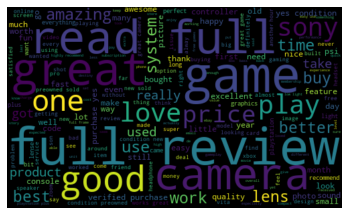

In [47]:
#Plot ebay word cloud
allWords = ''.join([review for review in ebay_dataset['review content']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

### Amazon Word Cloud

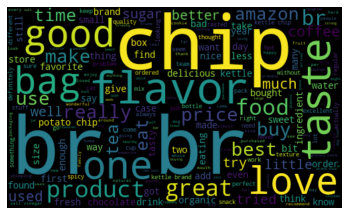

In [48]:
#Plot amazon word cloud
allWords = ''.join([review for review in amazon_dataset['Text']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

### Walmart Word Cloud

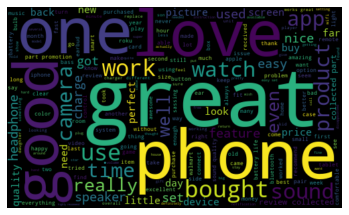

In [49]:
#Plot walmart word cloud
allWords = ''.join([review for review in walmart_dataset['Review']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

### eBay Sentiment Count

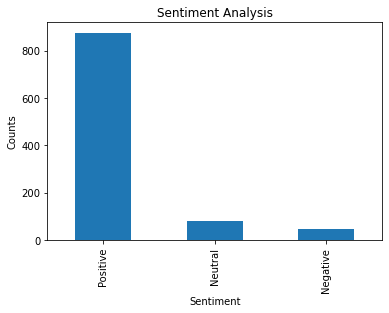

In [50]:
#Show the value counts
ebay_dataset['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
ebay_dataset['Analysis'].value_counts().plot(kind='bar')
plt.show()

### Amazon Sentiment Count

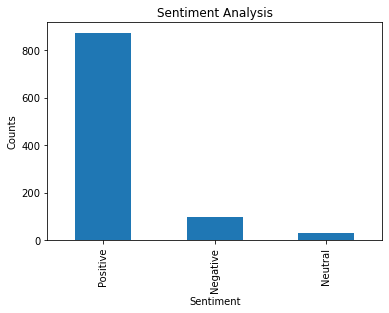

In [51]:
#Show the value counts
amazon_dataset['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
amazon_dataset['Analysis'].value_counts().plot(kind='bar')
plt.show()

### Walmart Sentiment Count

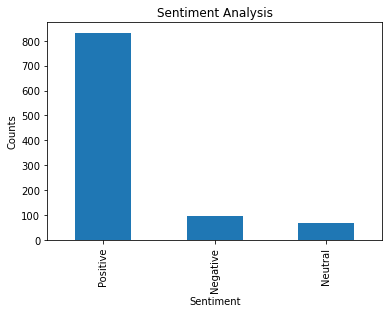

In [52]:
#Show the value counts
walmart_dataset['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
walmart_dataset['Analysis'].value_counts().plot(kind='bar')
plt.show()